# **Import packages and load the data set.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpt
import matplotlib.ticker
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import colors
import seaborn as sns
from scipy.stats import trim_mean

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
customer_data_cleaned = pd.read_csv('/content/drive/MyDrive/CS245/Project/Data set/marketing_campaign_cleaned.csv')

In [4]:
customer_data_cleaned = customer_data_cleaned.drop(columns='Unnamed: 0')

# **Data Visualisation**

ในส่วนของขั้นตอนนี้จะเป็นการวิเคราะห์ข้อมูลของลูกค้าในบริษัทการค้าโดยในภาพรวมของการวิเคราะห์ข้อมูลจะเป็นการวิเคราะห์ในส่วนของ ลูกค้า-บุคลิกภาพ และลักษณะการใช้จ่ายของลูกค้าเพื่อเป็นประโยชน์ต่อการสร้างแคมเปญหรือจัดทำโปรโมชั่น หรือการทำการตลาดต่อไป



**Guiding Questions**

คำถามที่เกี่ยวข้องกับแนวทางในการวิเคราะห์



1.   ลูกค้าหลักของบริษัทคือใคร?
2.   นิสัยการใช้จ่ายลูกค้าเป็นอย่างไร?
3.   การวิเคราะห์สามารถช่วยในส่วนของแคมเปญและการตลาดของบริษัทได้อย่างไร?








---





> แสดง graph ข้อมูลเบื้องต้นของลูกค้าใน data set เพื่อวิเคราะห์ภาพรวมของลูกค้า



count unique        top  freq      mean  ... min 25% 50% 75% max
Education         2205.0      3   Graduate  1112         -  ...   -   -   -   -   -
Marital_Status    2205.0      2    Partner  1423         -  ...   -   -   -   -   -
Children          2205.0      -          -     -  0.948299  ...   0   0   1   1   3
Has_Child         2205.0      2  Has Child  1576         -  ...   -   -   -   -   -
TotalAcceptedCmp  2205.0      -          -     -   0.45034  ...   0   0   0   1   5
Family_size       2205.0      -          -     -   2.59365  ...   1   2   3   3   5

[6 rows x 11 columns]

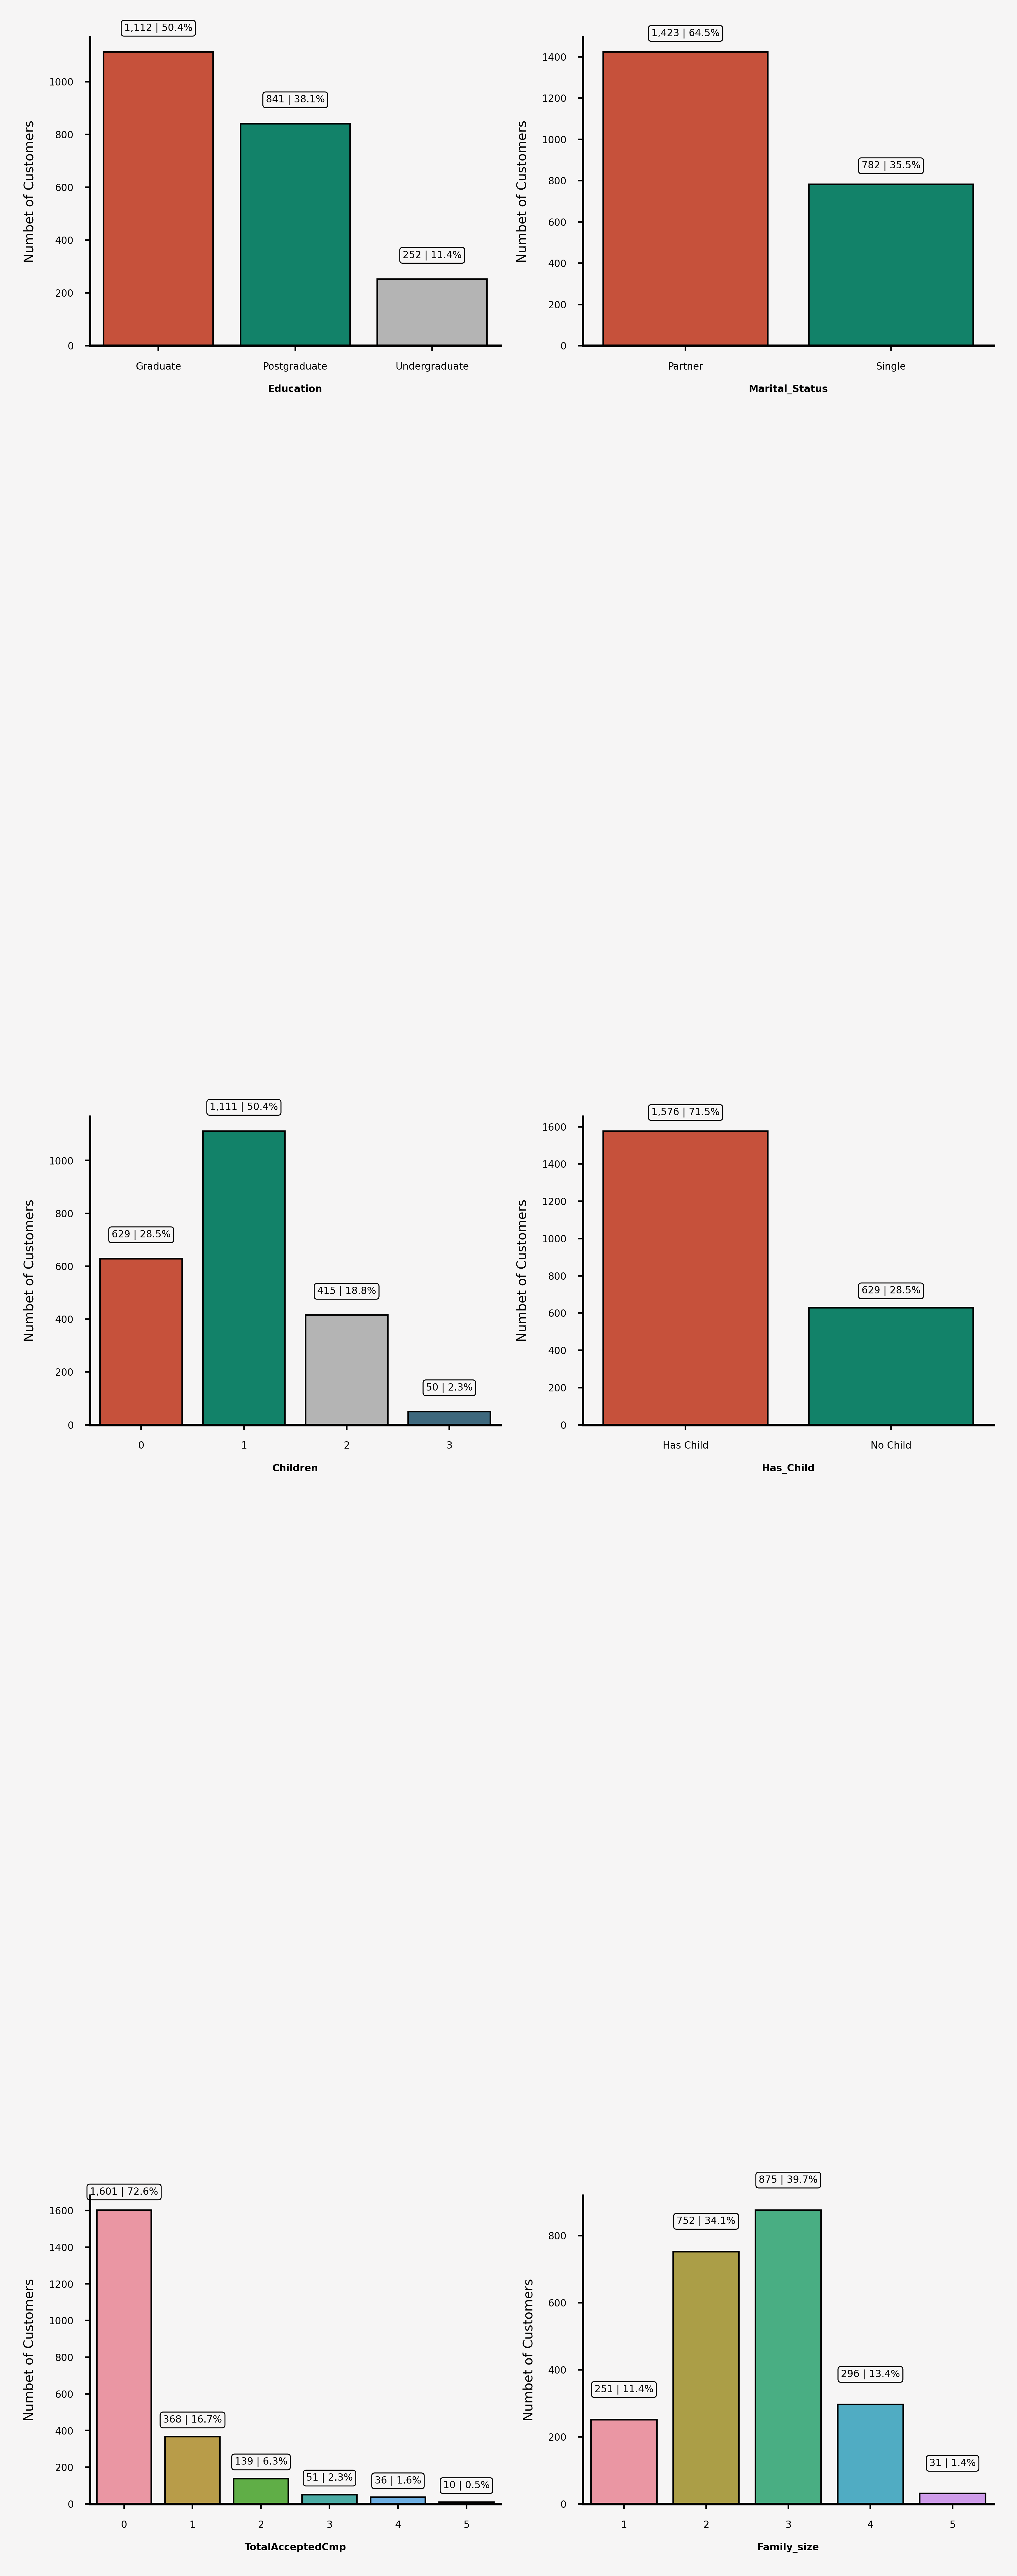

In [5]:
palette = ['#dd4124','#009473', '#b4b4b4', '#336b87']
cols = customer_data_cleaned.columns.values.tolist()
cols.remove('Income')
cols.remove('Complain')

bar = ['Education',
 'Marital_Status',
 'Children',
 'Has_Child',
 'TotalAcceptedCmp',
 'Family_size']
            
def setup_multiple_plot(data, X, y=None, w=5, h=14, rows=5, dpi=800, HSPACE=2.5, WSPACE=0.2):

    cols = 2
    #setting plot theme
    plt.rcParams['figure.dpi'] = dpi

    fig = plt.figure(figsize=(w,h), facecolor='#f6f5f5')
    gs = fig.add_gridspec(rows, cols)
    gs.update(wspace=WSPACE, hspace=HSPACE)

    background_color = "#f6f5f5"
    sns.set_palette(palette)
    
    #making multiple ax
    ax_dict = {}
    for row in range(rows):
        for col in range(cols):
            ax_dict["ax%s%s" %(row,col)] = fig.add_subplot(gs[row, col])

    locals().update(ax_dict)
    count = 0
    
    #setting theme for every ax in local()
    for indx,row in enumerate(range(rows)):
        for col in range(cols):
            x = customer_data_cleaned[X[count]].value_counts().values
            y = customer_data_cleaned[X[count]].value_counts().index
            
            locals()['ax' + str(row) + str(col)].tick_params(labelsize=3, width=0.5, length=1.5)

            for s in ["right", "top"]:
                locals()['ax' + str(row) + str(col)].spines[s].set_visible(False)

            
            locals()['ax' + str(row) + str(col)].set_facecolor(background_color)

            ax_sns = sns.barplot(x=y,y=x,ax=locals()['ax' + str(row) + str(col)],zorder=2,linewidth=0.5,ec='black')

            locals()['ax' + str(row) + str(col)].set_facecolor(background_color)
            locals()['ax' + str(row) + str(col)].set_xlabel(str(X[count]),fontsize=3, weight='bold')
            locals()['ax' + str(row) + str(col)].set_ylabel('Numbet of Customers' ,fontsize=4)

            for p in ax_sns.patches:
                if p.get_height() > 1500: 
                    value = f'{p.get_height():,.0f} | {(p.get_height()/customer_data_cleaned.shape[0]):,.1%}'
                    x = p.get_x() + p.get_width() /2
                    y = p.get_y() + p.get_height() + 100 
                    ax_sns.text(x, y, value, ha='center', va='center', fontsize=3, 
                    bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))
                elif p.get_height() < 1500 and p.get_height() > 500:
                    value = f'{p.get_height():,.0f} | {(p.get_height()/customer_data_cleaned.shape[0]):,.1%}'
                    x = p.get_x() + p.get_width() /2
                    y = p.get_y() + p.get_height() + 90 
                    ax_sns.text(x, y, value, ha='center', va='center', fontsize=3, 
                    bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))
                else:
                    value = f'{p.get_height():,.0f} | {(p.get_height()/customer_data_cleaned.shape[0]):,.1%}'
                    x = p.get_x() + p.get_width() /2
                    y = p.get_y() + p.get_height() + 90 
                    ax_sns.text(x, y, value, ha='center', va='center', fontsize=3, 
                    bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

            count+=1
            
setup_multiple_plot(customer_data_cleaned, X=bar, rows=3)

show = pd.DataFrame(data=[customer_data_cleaned.Education.describe(), customer_data_cleaned.Marital_Status.describe(), customer_data_cleaned.Children.describe(), customer_data_cleaned.Has_Child.describe(), customer_data_cleaned.TotalAcceptedCmp.describe(), customer_data_cleaned.Family_size.describe()], 
                    index=['Education', 'Marital_Status', 'Children', 'Has_Child', 'TotalAcceptedCmp', 'Family_size'])
show.fillna('-')

In [6]:
plt.rcParams['figure.figsize'] = [17, 13]
ax = sns.histplot(data = customer_data_cleaned.Age, color='#336b87')
ax.set(title = "Ages of Customers",
      ylabel = 'Numbet of Customers',
      xlabel = "Age")
ax.grid(axis = "y")

print("Average age of customers", np.round(customer_data_cleaned.Age.mean()), "years old")
show = pd.DataFrame(customer_data_cleaned.Age.describe())
show

Average age of customers 52.0 years old


Age
count  2205.000000
mean     52.090249
std      11.702045
min      25.000000
25%      44.000000
50%      51.000000
75%      62.000000
max      81.000000

In [7]:
fig, ax = plt.subplots(1,2, figsize = (20,12))
sns.histplot(ax = ax[0], data = customer_data_cleaned.Income, color = "#dd4124")
sns.histplot(ax = ax[1], data = customer_data_cleaned.Spending, color = "#009473")
ax[0].set_title("Income of Customers")
ax[1].set_title("Spending of Customers")
for num in [0,1]:
    ax[num].grid(axis = "y")
    ax[num].set(ylabel = 'Numbet of Customers')

show = pd.DataFrame(data=[customer_data_cleaned.Income.describe(), customer_data_cleaned.Spending.describe()], index=['Income', 'Spending'])
show

count          mean           std  ...      50%      75%       max
Income    2205.0  51850.314739  21087.414420  ...  51369.0  68397.0  162397.0
Spending  2205.0    605.641723    601.599226  ...    396.0   1045.0    2525.0

[2 rows x 8 columns]

In [8]:
plt.rcParams['figure.figsize'] = [12, 12]
ax = sns.histplot(data = customer_data_cleaned.Time_With_Company, color = "#009473")

ax.set_title("Time With Company")
ax.set_xlabel("Number of Months")
ax.set_ylabel('Numbet of Customers')
ax.grid(axis = 'y')

for p in ax.patches:
   value = f'{(p.get_height()/customer_data_cleaned.shape[0]):,.1%}'
   x = p.get_x() + p.get_width() / 2
   y = p.get_y() + p.get_height() + 3.5 
   ax.text(x, y, value, ha='center', va='center', fontsize=11, 
   bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

print("All customer have time with company over", int(round(customer_data_cleaned.Time_With_Company.min(), 0)), "months")
show = pd.DataFrame(customer_data_cleaned.Time_With_Company.describe())
show

All customer have time with company over 91 months


Time_With_Company
count        2205.000000
mean          102.326742
std             6.747723
min            90.533333
25%            96.533333
50%           102.400000
75%           108.166667
max           113.833333

In [9]:
fig, ax = plt.subplots(3,2, figsize = (18,18))

sns.histplot(ax = ax[0,0], data = customer_data_cleaned.Wine, color = '#dd4124')
sns.histplot(ax = ax[0,1], data = customer_data_cleaned.Fruit, color = '#009473')
sns.histplot(ax = ax[1,0], data = customer_data_cleaned.Meat, color = '#b4b4b4')
sns.histplot(ax = ax[1,1], data = customer_data_cleaned.Sweets, color = '#336b87')
sns.histplot(ax = ax[2,0], data = customer_data_cleaned.Fish, color = '#ff6ef0')
sns.histplot(ax = ax[2,1], data = customer_data_cleaned.Gold, color = '#ffbb00')

fig.suptitle("Items bought by Customers", fontsize = 20)
ax[0,0].annotate('All amounts in USD [$] \n\n', xy = (0,1), xycoords = 'axes fraction', fontsize = 15)

ax[0,0].set_xlabel("Wine", fontsize = 15, labelpad = 15)
ax[0,1].set_xlabel("Fruit", fontsize = 15, labelpad = 15)
ax[1,0].set_xlabel("Meat", fontsize = 15, labelpad = 15)
ax[1,1].set_xlabel("Sweets", fontsize = 15, labelpad = 15)
ax[2,0].set_xlabel("Fish", fontsize = 15, labelpad = 15)
ax[2,1].set_xlabel("Gold", fontsize = 15, labelpad = 15)

ax[0,0].grid(axis = "y")
ax[0,1].grid(axis = "y")
ax[1,0].grid(axis = "y")
ax[1,1].grid(axis = "y")
ax[2,0].grid(axis = "y")
ax[2,1].grid(axis = "y")

all = customer_data_cleaned.Fruit.sum() + customer_data_cleaned.Wine.sum() + customer_data_cleaned.Meat.sum() +customer_data_cleaned.Fish.sum() + customer_data_cleaned.Gold.sum() + customer_data_cleaned.Sweets.sum()
print("Amount spent on fruit in last 2 years :", round(customer_data_cleaned.Fruit.sum() / all *100, 2), '%')
print("Amount spent on wine in last 2 years :", round(customer_data_cleaned.Wine.sum() / all *100, 2), '%')
print("Amount spent on meat in last 2 years :", round(customer_data_cleaned.Meat.sum() / all *100, 2), '%')
print("Amount spent on fish fish in last 2 years :", round(customer_data_cleaned.Fish.sum() / all *100, 2), '%')
print("Amount spent on gold in last 2 years :", round(customer_data_cleaned.Gold.sum() / all *100, 2), '%')
print("Amount spent on sweets in last 2 years :", round(customer_data_cleaned.Sweets.sum() / all *100, 2), '%', '\n')

show = pd.DataFrame(data=[customer_data_cleaned.Wine.describe(), customer_data_cleaned.Fruit.describe(), customer_data_cleaned.Meat.describe(), customer_data_cleaned.Sweets.describe(), customer_data_cleaned.Fish.describe(), customer_data_cleaned.Gold.describe()],
                    index=['Wine', 'Fruit', 'Meat', 'Sweet', 'Fish', 'Gold'])
show

Amount spent on fruit in last 2 years : 4.36 %
Amount spent on wine in last 2 years : 50.55 %
Amount spent on meat in last 2 years : 27.16 %
Amount spent on fish fish in last 2 years : 6.23 %
Amount spent on gold in last 2 years : 7.23 %
Amount spent on sweets in last 2 years : 4.46 % 



count        mean         std  min   25%    50%    75%     max
Wine   2205.0  306.175057  337.485647  0.0  24.0  178.0  507.0  1493.0
Fruit  2205.0   26.400000   39.786403  0.0   2.0    8.0   33.0   199.0
Meat   2205.0  164.520635  215.268956  0.0  16.0   68.0  232.0   984.0
Sweet  2205.0   27.007710   40.830083  0.0   1.0    8.0   33.0   198.0
Fish   2205.0   37.755102   54.825485  0.0   3.0   12.0   50.0   259.0
Gold   2205.0   43.783220   51.142564  0.0   9.0   25.0   56.0   262.0

In [10]:
print("Percentage of purchases made through the company’s web site :", round(customer_data_cleaned.Web.sum() / (customer_data_cleaned.Web.sum()+customer_data_cleaned.Catalog.sum()+customer_data_cleaned.Store.sum()) *100, 2), '%')
print("Percentage of purchases made using a catalogue :", round(customer_data_cleaned.Catalog.sum() / (customer_data_cleaned.Web.sum()+customer_data_cleaned.Catalog.sum()+customer_data_cleaned.Store.sum()) *100, 2), '%')
print("Percentage of purchases made directly in stores :", round(customer_data_cleaned.Store.sum() / (customer_data_cleaned.Web.sum()+customer_data_cleaned.Catalog.sum()+customer_data_cleaned.Store.sum()) *100, 2), '%\n')

show = pd.DataFrame(data=[customer_data_cleaned.Web.describe(), customer_data_cleaned.Catalog.describe(), customer_data_cleaned.Store.describe(), customer_data_cleaned.WebVisits.describe()],
                    index=['Web', 'Catalog', 'Store', 'WebVisits'])
show

Percentage of purchases made through the company’s web site : 32.48 %
Percentage of purchases made using a catalogue : 21.02 %
Percentage of purchases made directly in stores : 46.51 %



count      mean       std  min  25%  50%  75%   max
Web        2205.0  4.067120  2.629415  0.0  2.0  4.0  6.0  11.0
Catalog    2205.0  2.632200  2.746943  0.0  0.0  2.0  4.0  11.0
Store      2205.0  5.824036  3.241051  0.0  3.0  5.0  8.0  13.0
WebVisits  2205.0  5.336508  2.414445  0.0  3.0  6.0  7.0  20.0



---



# **Clustering**
จะทำการแบ่งกลุ่มของลูกค้าออกเป็น 4 กลุ่มเพื่อวิเคราะห์พฤติกรรมของลูกค้าแต่ละกลุ่มได้ง่ายและเจาะจงมากขึ้น 

ในส่วนนี้ เราจะสร้างกลุ่มลูกค้าสี่กลุ่มโดยอิงตาม

*   รายได้
*   เวลาที่เป็นสมาชิกกับบริษัท
*   การใช้จ่าย

โดยทั้ง 4 กลุ่มจะมีรายละเอียดดังนี้

1.   Platinum Member : ลูกค้าที่มีรายได้สูง, รายจ่ายสูง และเป็นสมาชิกกับบริษัทนาน
2.   Gold Member : ลูกค้าที่มีรายได้สูง, รายจ่ายสูง และระยะเวลาที่เป็นสมาชิกกับบริษัทสั้น
3.   Silver Member :  ลูกค้าที่มีรายได้น้อย, รายจ่ายน้อย และระยะเวลาที่เป็นสมาชิกกับบริษัทสั้น
4.   Bronze Member : ลูกค้าที่มีรายได้น้อย, รายจ่ายน้อย และเป็นสมาชิกกับบริษัทนาน








In [11]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.mixture import GaussianMixture

scalar = StandardScaler()
temp = customer_data_cleaned[["Income", "Time_With_Company", "Spending"]].copy()

X_std = scalar.fit_transform(temp)
X = normalize(X_std, norm = 'l2')

In [12]:
gmm = GaussianMixture(n_components = 4, covariance_type = "spherical", random_state = 0, max_iter = 1000).fit(X)
labels = gmm.predict(X)
temp["Cluster"] = labels
temp.head()

Income  Time_With_Company  Spending  Cluster
0  58138.0         112.633333      1617        1
1  46344.0          94.300000        27        3
2  71613.0         100.933333       776        2
3  26646.0          95.166667        53        3
4  58293.0          95.900000       422        3

In [13]:
#เลือกกลุ่มตาม Spending, Time_With_Company และ Income ตามกลุ่มที่ได้มีการจัดไว้
temp = temp.replace({0 : "Bronze Member",
                     3 : "Silver Member",
                     2 : "Gold Member",
                     1 : "Platinum Member"})

In [14]:
customer_data_cleaned['Cluster'] = temp["Cluster"]

pd.options.display.float_format = "{:.0f}".format
summary = customer_data_cleaned[['Income','Spending','Time_With_Company','Cluster']]
summary.set_index("Cluster", inplace = True)
summary = summary.groupby('Cluster').describe().transpose()
summary

Cluster                  Bronze Member  ...  Silver Member
Income            count            586  ...            631
                  mean           34659  ...          37840
                  std            11972  ...          12234
                  min             3502  ...           1730
                  25%            26350  ...          29267
                  50%            35178  ...          38361
                  75%            43174  ...          46900
                  max            65316  ...          64587
Spending          count            586  ...            631
                  mean             185  ...            122
                  std              176  ...            127
                  min                5  ...              6
                  25%               47  ...             39
                  50%              103  ...             65
                  75%              295  ...            159
                  max              839  ...            636
Time_With_Company count            586  ...            631
                  mean             108  ...             96
                  std                3  ...              3
                  min              102  ...             91
                  25%              105  ...             93
                  50%              108  ...             96
                  75%              111  ...             99
                  max              114  ...            102

[24 rows x 4 columns]

In [15]:
ax = sns.scatterplot(x = customer_data_cleaned.Income,
                     y = customer_data_cleaned.Spending,
                     hue = customer_data_cleaned.Cluster,
                     palette = palette)

ax.set_title("The graph shows the distribution of Amount Spent compared to Income of Cluster")
ax.set_xlabel("Income (USD)",)
ax.set_ylabel("Amount Spent (USD)")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [16]:
ax = sns.scatterplot(x = customer_data_cleaned.Time_With_Company,
                     y = customer_data_cleaned.Spending,
                     hue = customer_data_cleaned.Cluster,
                     palette = palette)

ax.set_title("The graph shows the distribution of Amount Spent compared to Months With Company of Cluster")
ax.set_xlabel("Months With Company")
ax.set_ylabel("Amount Spent (USD)")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [17]:
ax = sns.scatterplot(x = customer_data_cleaned.Time_With_Company,
                     y = customer_data_cleaned.Income,
                     hue = customer_data_cleaned.Cluster,
                     palette = palette)

ax.set_title("The graph shows the distribution of Income compared to Months With Company of Cluster")
ax.set_xlabel("Months With Company")
ax.set_ylabel("Income (USD)")
plt.show()

Output hidden; open in https://colab.research.google.com to view.



> ตรวจเช็คระดับการศึกษาของลูกค้าในแต่ละ cluster



In [18]:
fig, ax = plt.subplots(2,2, figsize = (18, 11))

sns.countplot(ax = ax[0,0], data = customer_data_cleaned.loc[customer_data_cleaned.Cluster == "Platinum Member"], y = "Education", order = ["Undergraduate", "Graduate", "Postgraduate"], palette = palette)
sns.countplot(ax = ax[0,1], data = customer_data_cleaned.loc[customer_data_cleaned.Cluster == "Gold Member"], y = "Education", order = ["Undergraduate", "Graduate", "Postgraduate"], palette = palette)
sns.countplot(ax = ax[1,0], data = customer_data_cleaned.loc[customer_data_cleaned.Cluster == "Silver Member"], y = "Education", order = ["Undergraduate", "Graduate", "Postgraduate"], palette = palette)
sns.countplot(ax = ax[1,1], data = customer_data_cleaned.loc[customer_data_cleaned.Cluster == "Bronze Member"], y = "Education", order = ["Undergraduate", "Graduate", "Postgraduate"], palette = palette)

ax[0,0].set_title("Platinum Member")
ax[0,1].set_title("Gold Member")
ax[1,0].set_title("Silver Member")
ax[1,1].set_title("Bronze Member")

for i in [0,1]:
    for j in [0,1]:
        ax[i,j].set(xlabel = "Number of Members", ylabel = None)

fig.suptitle("Education of Customers by Cluster", fontsize = 20)

show = pd.DataFrame(data=[customer_data_cleaned.Education.loc[customer_data_cleaned.Cluster == "Platinum Member"].describe(), customer_data_cleaned.Education.loc[customer_data_cleaned.Cluster == "Gold Member"].describe(), customer_data_cleaned.Education.loc[customer_data_cleaned.Cluster == "Silver Member"].describe(), customer_data_cleaned.Education.loc[customer_data_cleaned.Cluster == "Bronze Member"].describe()],
                    index=['Platinum Member', 'Gold Member', 'Silver Member', 'Bronze Member'])
temp = []
for i in show.index :
  temp.append(str(round(show['freq'][i] / show['count'][i] * 100, 2)) + '%')
show['Percentage'] = temp
show

count  unique       top  freq Percentage
Platinum Member    530       3  Graduate   267     50.38%
Gold Member        458       3  Graduate   243     53.06%
Silver Member      631       3  Graduate   288     45.64%
Bronze Member      586       3  Graduate   314     53.58%



---





พฤติกรรมการซื้อของแต่ละ cluster



In [19]:
fig, ax = plt.subplots(2,2, figsize = (18,18))

PM = customer_data_cleaned.loc[customer_data_cleaned.Cluster == "Platinum Member"]
GM = customer_data_cleaned.loc[customer_data_cleaned.Cluster == "Gold Member"]
SM = customer_data_cleaned.loc[customer_data_cleaned.Cluster == "Silver Member"]
BM = customer_data_cleaned.loc[customer_data_cleaned.Cluster == "Bronze Member"]

ax[0,0].set_title("Platinum Member", fontsize = 15, pad = 15)
ax[0,1].set_title("Gold Member", fontsize = 15, pad = 15)
ax[1,0].set_title("Silver Member", fontsize = 15, pad = 15)
ax[1,1].set_title("Bronze Member", fontsize = 15, pad = 15)

sns.histplot(ax = ax[0,0], data = PM.Web, color = palette[0], label = "Web Purchases")
sns.histplot(ax = ax[0,0], data = PM.Catalog, color = palette[1], label = "Catalog Purchases")
sns.histplot(ax = ax[0,0], data = PM.Store, color = palette[2], label = "Store Purchases")

sns.histplot(ax = ax[0,1], data = GM.Web, color = palette[0])
sns.histplot(ax = ax[0,1], data = GM.Catalog, color = palette[1])
sns.histplot(ax = ax[0,1], data = GM.Store, color = palette[2])

sns.histplot(ax = ax[1,0], data = SM.Web, color = palette[0])
sns.histplot(ax = ax[1,0], data = SM.Catalog, color = palette[1])
sns.histplot(ax = ax[1,0], data = SM.Store, color = palette[2])

sns.histplot(ax = ax[1,1], data = BM.Web, color = palette[0])
sns.histplot(ax = ax[1,1], data = BM.Catalog, color = palette[1])
sns.histplot(ax = ax[1,1], data = BM.Store, color = palette[2])

for i in [0,1]:
    for j in [0,1]:
        ax[i,j].set(xlabel = "Counts", ylabel = "Number of Members")
        ax[i,j].grid(axis = "y")
        
ax[0,0].legend()

fig.suptitle("Purchasing Habits of Customers by Cluster", fontsize = 20)

show1 = pd.DataFrame(data = [customer_data_cleaned.Web.loc[customer_data_cleaned.Cluster == "Platinum Member"].describe(), customer_data_cleaned.Catalog.loc[customer_data_cleaned.Cluster == "Platinum Member"].describe(), customer_data_cleaned.Store.loc[customer_data_cleaned.Cluster == "Platinum Member"].describe()])
show2 = pd.DataFrame(data = [customer_data_cleaned.Web.loc[customer_data_cleaned.Cluster == "Gold Member"].describe(), customer_data_cleaned.Catalog.loc[customer_data_cleaned.Cluster == "Gold Member"].describe(), customer_data_cleaned.Store.loc[customer_data_cleaned.Cluster == "Gold Member"].describe()]) 
show3 = pd.DataFrame(data = [customer_data_cleaned.Web.loc[customer_data_cleaned.Cluster == "Silver Member"].describe(), customer_data_cleaned.Catalog.loc[customer_data_cleaned.Cluster == "Silver Member"].describe(), customer_data_cleaned.Store.loc[customer_data_cleaned.Cluster == "Silver Member"].describe()]) 
show4 = pd.DataFrame(data = [customer_data_cleaned.Web.loc[customer_data_cleaned.Cluster == "Bronze Member"].describe(), customer_data_cleaned.Catalog.loc[customer_data_cleaned.Cluster == "Bronze Member"].describe(), customer_data_cleaned.Store.loc[customer_data_cleaned.Cluster == "Bronze Member"].describe()])

index = ['Platinum Member', '', '' , 'Gold Member', '', '', 'Silver Member', '', '', 'Bronze Member', '', '']
show = pd.concat([show1, show2, show3, show4], axis=0)
show = show.reset_index()
show = show.rename(columns={'index': ''})
show['Cluster'] = index
show = show.set_index('Cluster')
show

count  mean  std  min  25%  50%  75%  max
Cluster                                                            
Platinum Member      Web    530     6    3    2    4    6    8   11
                 Catalog    530     5    2    1    3    5    6   11
                   Store    530     9    3    3    6    9   11   13
Gold Member          Web    458     5    2    0    4    5    7   11
                 Catalog    458     5    3    0    3    4    6   11
                   Store    458     8    3    0    6    8   10   13
Silver Member        Web    631     2    2    0    1    2    3   11
                 Catalog    631     1    1    0    0    0    1    6
                   Store    631     4    1    0    3    3    4   10
Bronze Member        Web    586     3    2    0    1    3    4   11
                 Catalog    586     1    1    0    0    1    1    8
                   Store    586     4    2    0    3    3    4   11



> จากกราฟจะสังเกตุได้ว่าลูกค้าระดับ platinum มีแนวโน้มที่จะซื้อทางเว็บมากกว่าลูกค้าระดับ gold ในทางกลับกัน ลูกค้าระดับ gold มักจะซื้อจากร้านค้าประเภทต่างๆ เป็นจำนวนมาก 

> ลูกค้าระดับ silver และลูกค้าระดับ bronze มีปริมาณการซื้อที่ต่ำมาก โดยเฉพาะในส่วนแคตตาล็อก







---



เพื่อให้เห็นภาพ เราจะแสดงกราฟจำนวนการเข้าชมเว็บไซต์ในเดือนที่ผ่านมาจากแต่ละ cluster

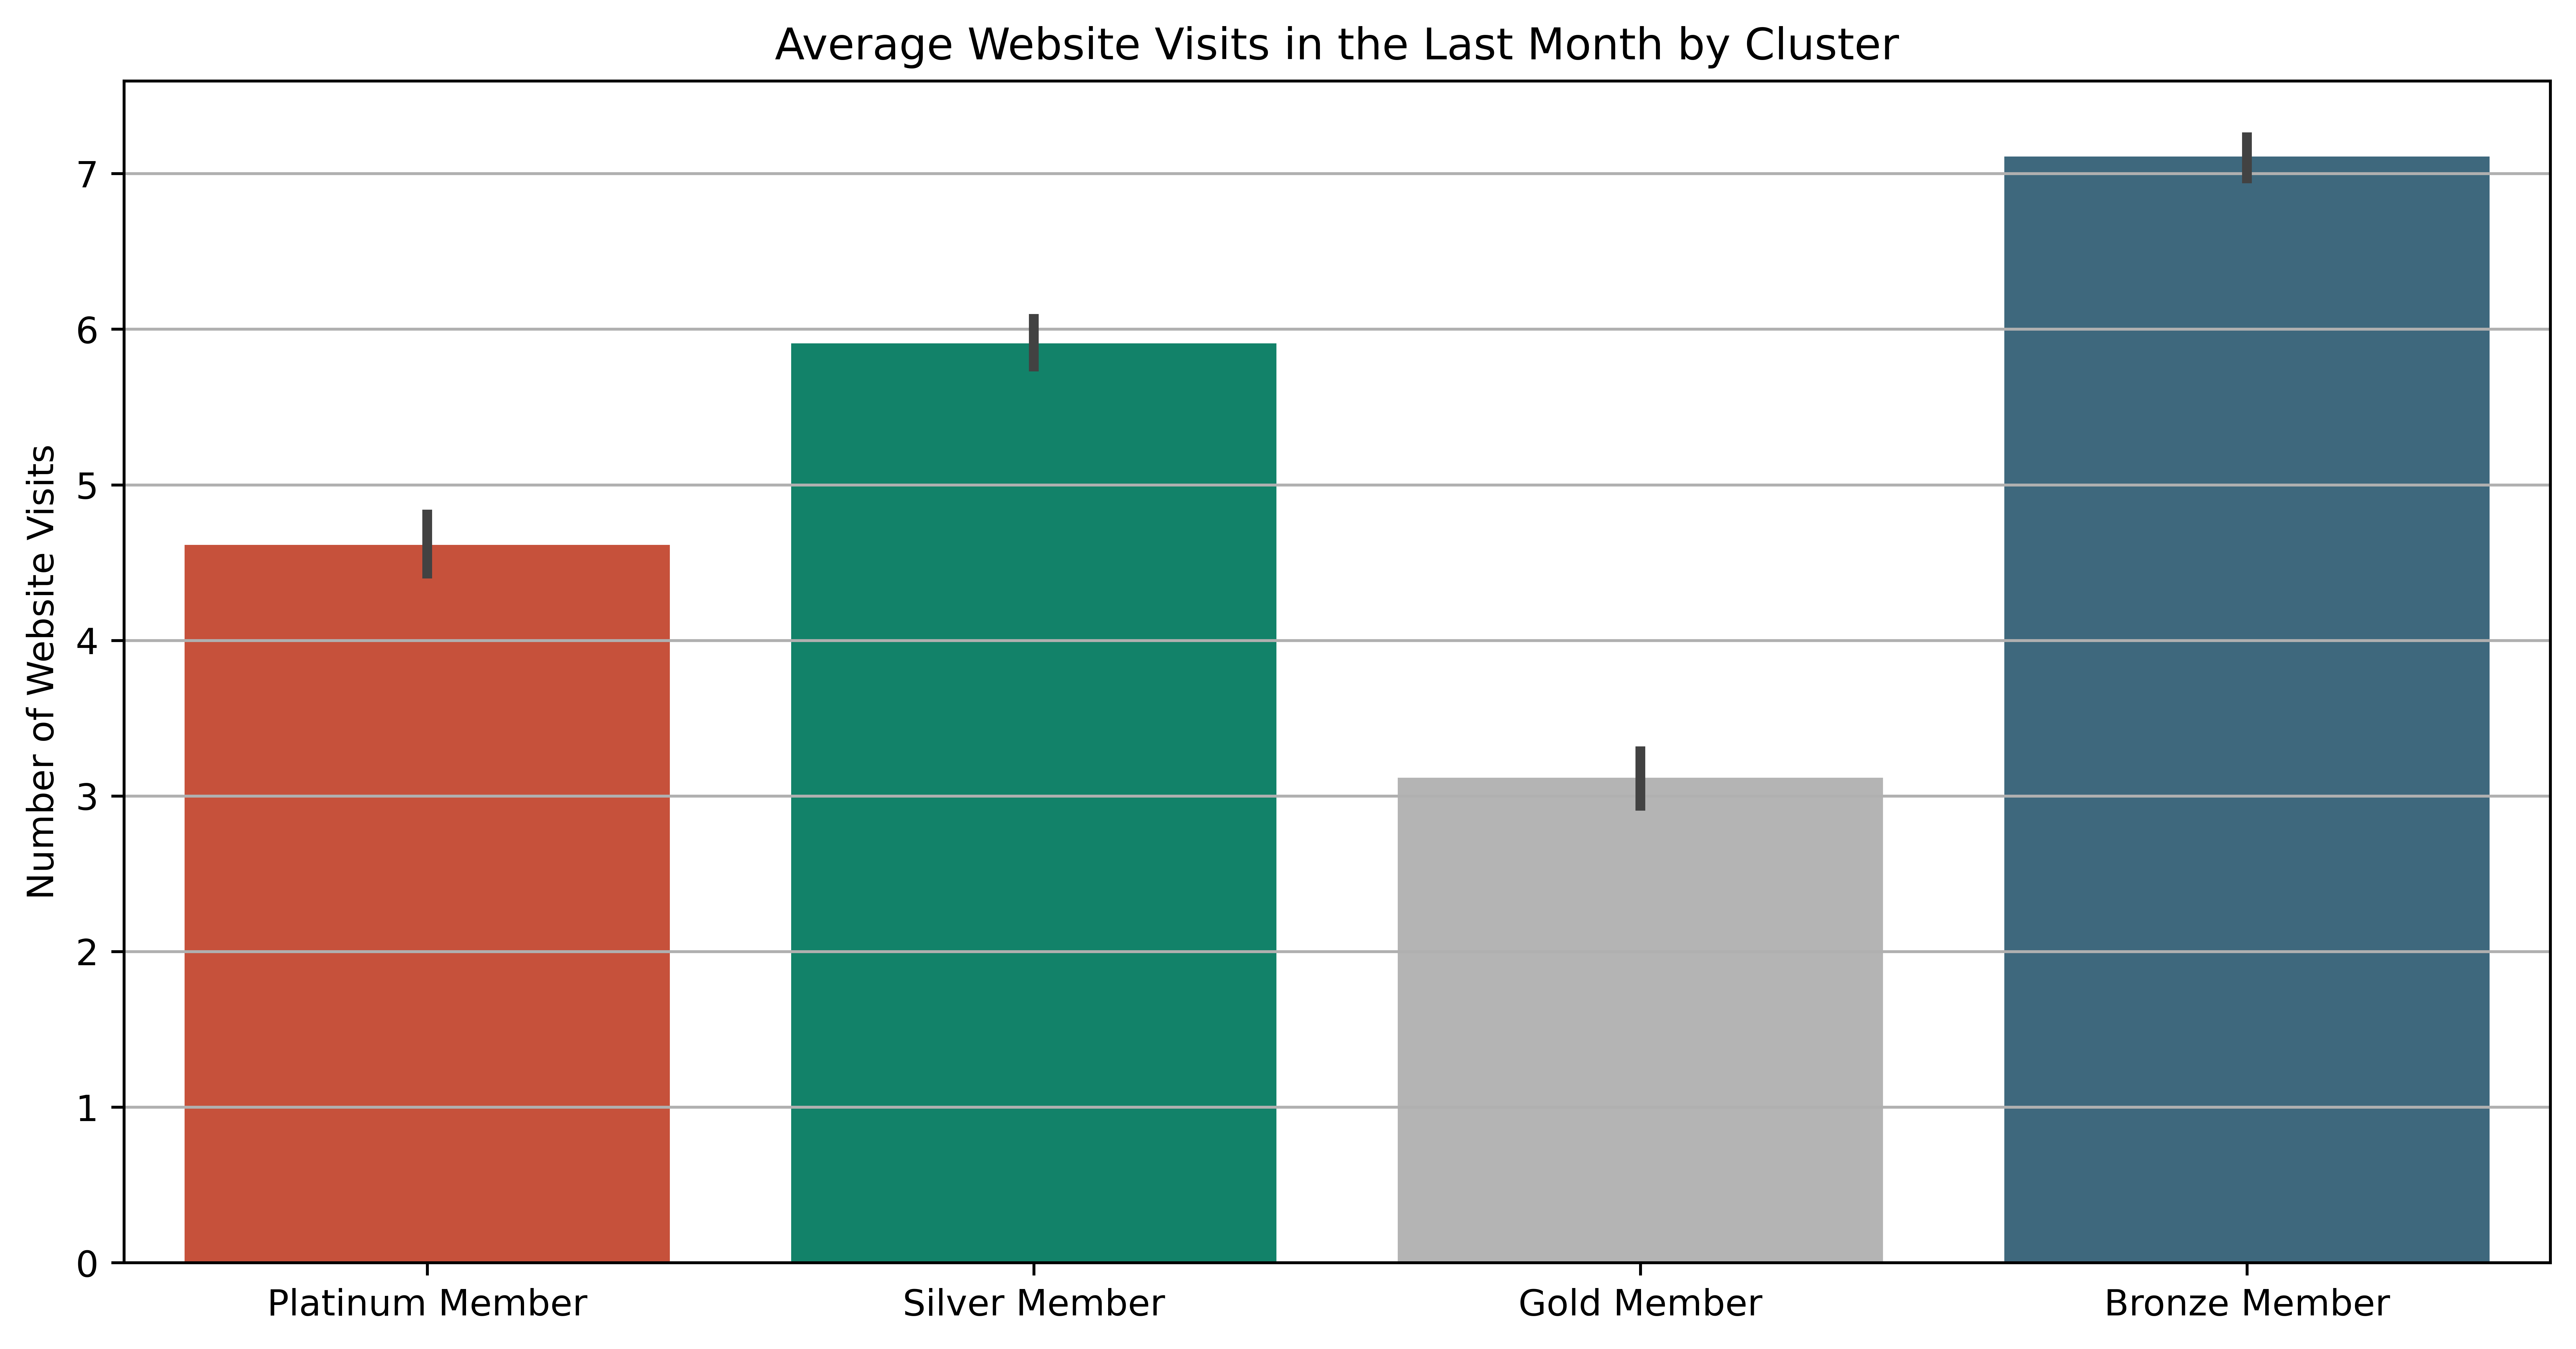

In [20]:
plt.rcParams['figure.figsize'] = [12, 6]

ax = sns.barplot(x = customer_data_cleaned.Cluster, y = customer_data_cleaned.WebVisits, palette = palette)
ax.set_ylabel("Number of Website Visits")
ax.set_xlabel(None)
ax.set_title("Average Website Visits in the Last Month by Cluster")
ax.grid(axis = 'y')

plt.show()



> จากกราฟจะเห็นได้ว่า กลุ่มที่มีการเข้าชมเว็บไซต์มากที่สุดคือกลุ่มที่ใช้จ่ายน้อย (Bronze Member)





---



ต่อไปจะเป็นพฤติกรรมการใช้จ่ายของลูกค้า

In [21]:
fig, ax = plt.subplots(1,2, figsize = (15,10))
sns.violinplot(ax = ax[0], x = customer_data_cleaned.Has_Child, y = customer_data_cleaned.Spending)
sns.violinplot(ax = ax[1], x = customer_data_cleaned.Marital_Status, y = customer_data_cleaned.Spending)

ax[0].set_ylabel("Spending (USD)")
ax[1].set_ylabel(None)

for i in [0,1]:
    ax[i].set_xlabel(None)
    
plt.suptitle("Spending Habits by Customer Demographic", fontsize = 15)

Text(0.5, 0.98, 'Spending Habits by Customer Demographic')



> จากกราฟแสดงให้เห็นว่าโดยเฉลี่ยแล้ว ลูกค้าที่ไม่มีบุตรใช้จ่ายมากกว่าลูกที่มีบุตร 



Types of products the customers are buying


Wine  Fruit    Meat  Sweets
Cluster                                       
Bronze Member     49912   5129   23882    5047
Gold Member      239812  22970  142915   23093
Platinum Member  345459  27000  179402   28313
Silver Member     39933   3113   16569    3099

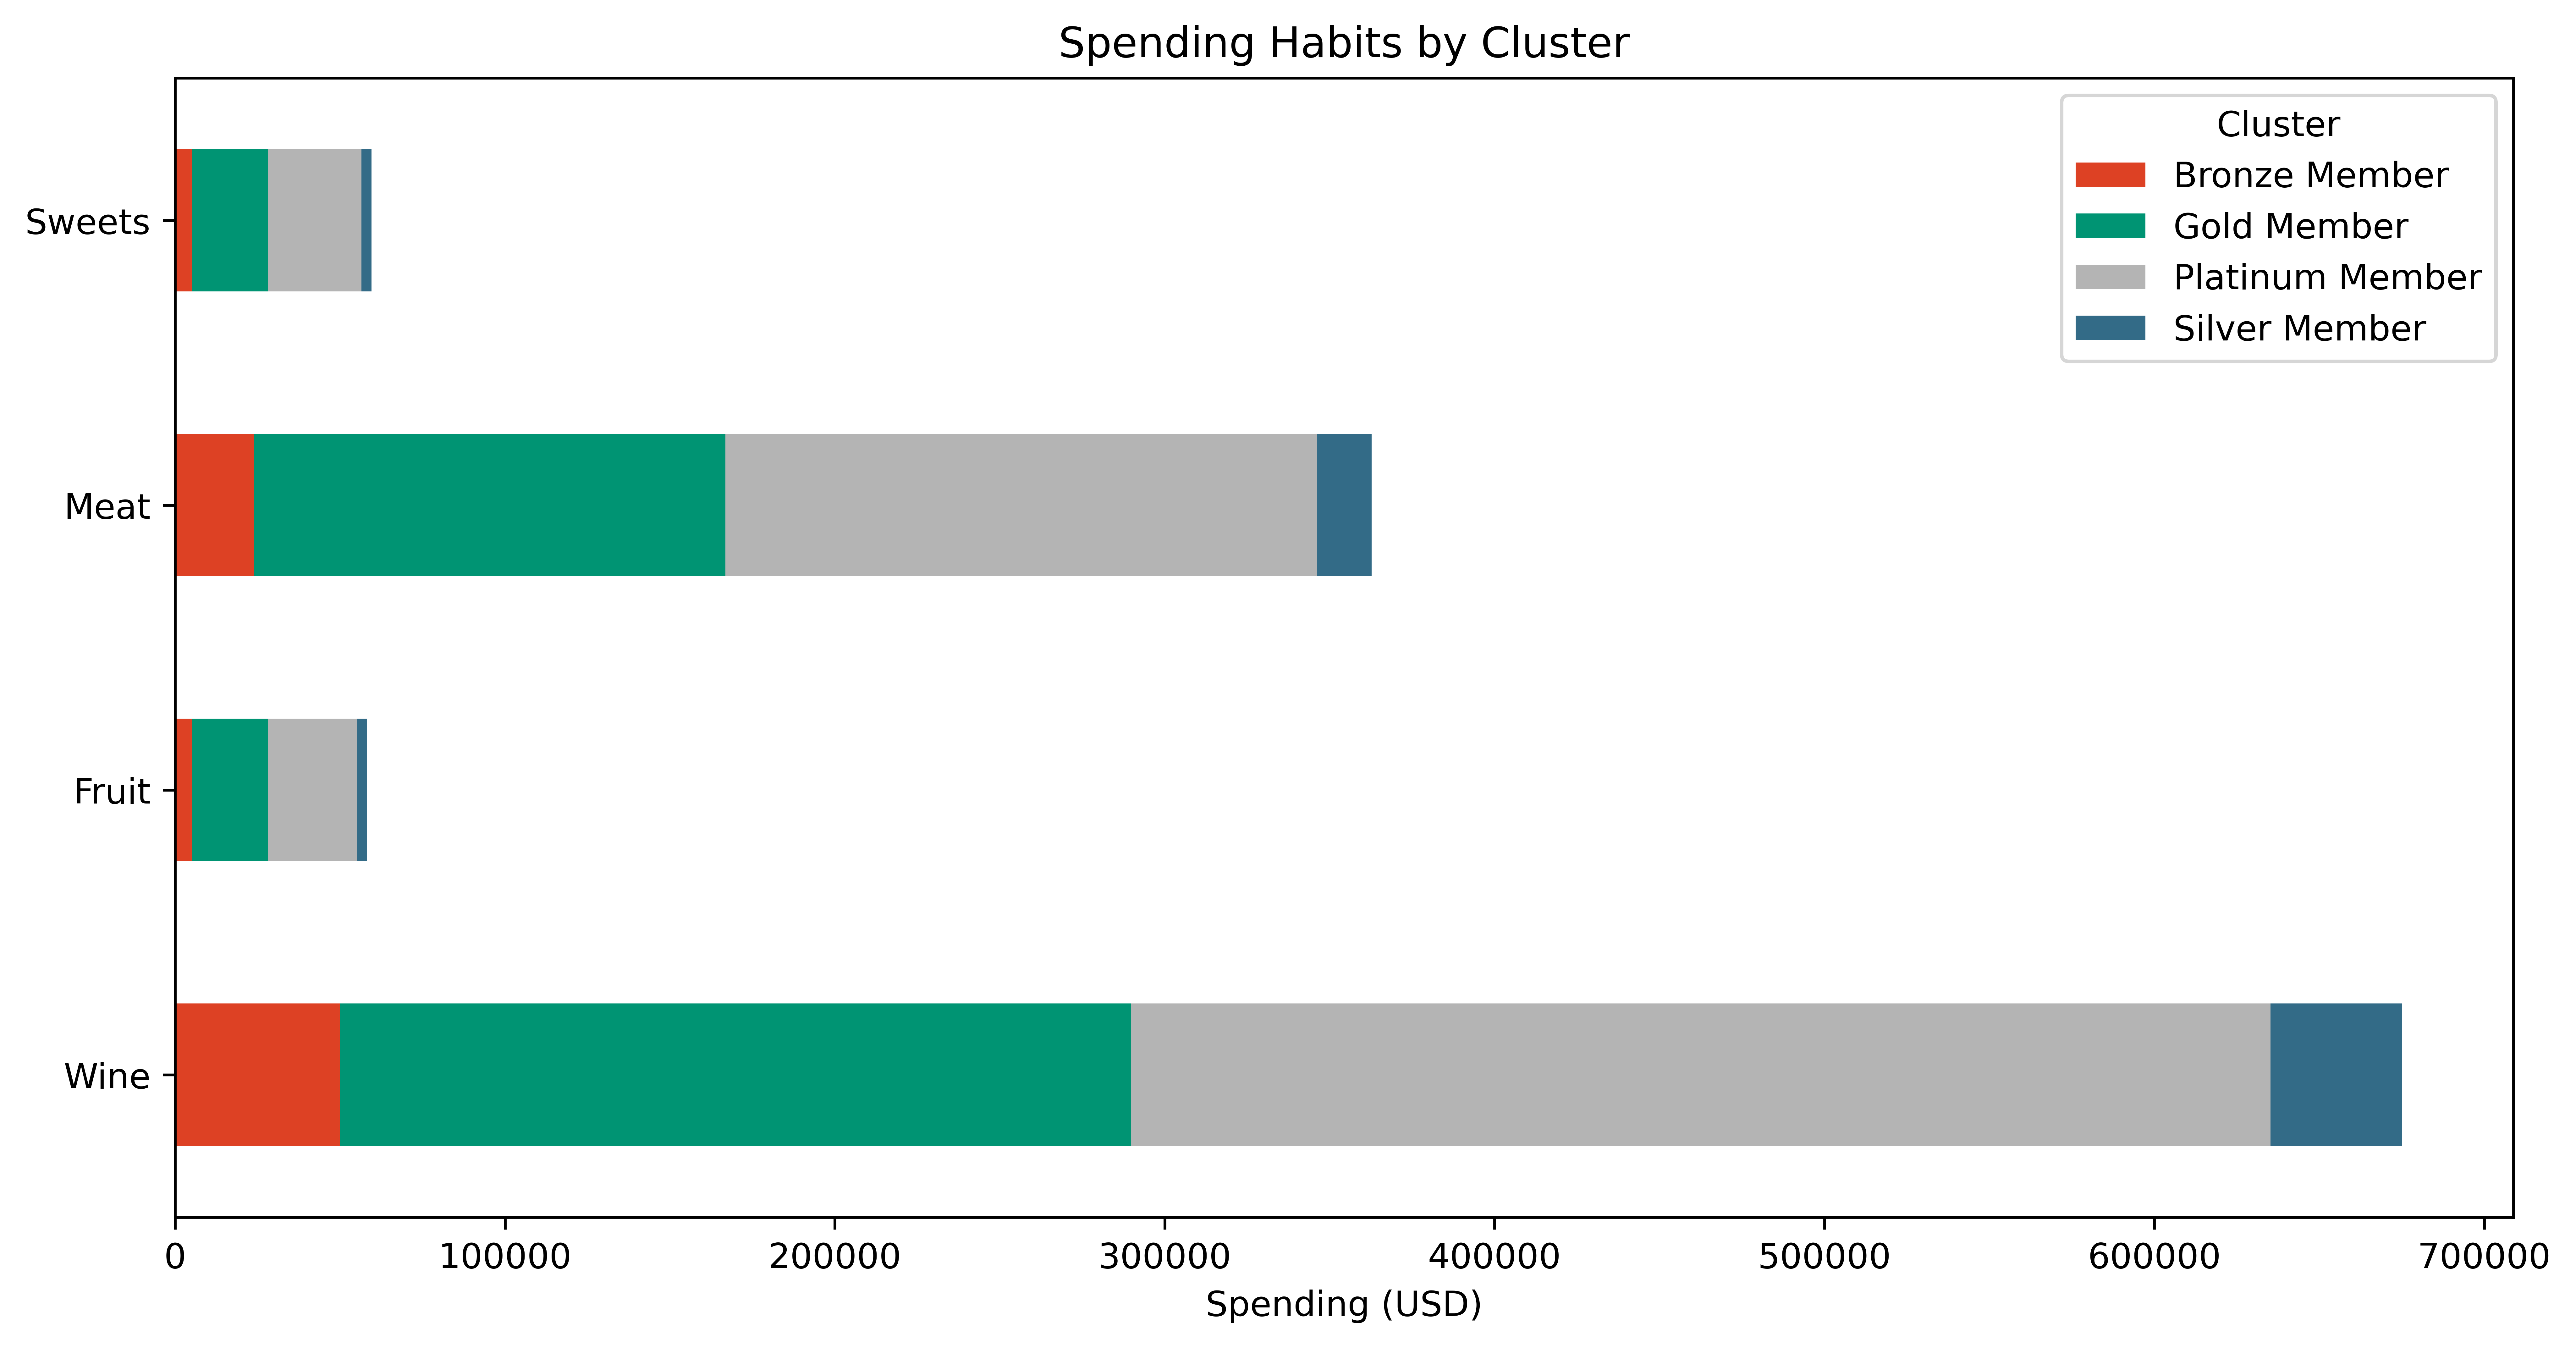

In [22]:
temp = customer_data_cleaned.loc[:, ["Wine", "Fruit", "Meat", "Sweets", "Cluster"]]
temp = temp.groupby("Cluster").sum()

ax = temp.transpose().plot(kind = "barh", stacked = True)
ax.set_xlabel("Spending (USD)")
ax.set_title("Spending Habits by Cluster")

print("Types of products the customers are buying")
temp.head()



> จากกราฟแสดงให้เห็นว่าลูกค้าจะใช้เงินกับไวน์มากที่สุด 



In [23]:
ax = sns.scatterplot(data = customer_data_cleaned, x = "Income", y = "Wine", hue = "Has_Child")
ax.set_title("Income vs. Wine Spending", pad = 10)
ax.set_xlabel("Income (USD)")
ax.set_ylabel("Wine Spending (USD)")

Output hidden; open in https://colab.research.google.com to view.

In [24]:
show = pd.DataFrame(data=[customer_data_cleaned.loc[customer_data_cleaned.Has_Child == "No Child"].Wine.describe(), customer_data_cleaned.loc[customer_data_cleaned.Has_Child == "Has Child"].Wine.describe()], index=["No Child", "Has Child"])
show['counts'] = [customer_data_cleaned.loc[customer_data_cleaned.Has_Child == "No Child"].Wine.sum(), customer_data_cleaned.loc[customer_data_cleaned.Has_Child == "Has Child"].Wine.sum()]

print("Statistics of customers buying wine")
show

Statistics of customers buying wine


count  mean  std  min  25%  50%  75%  max  counts
No Child     629   490  370    0  179  454  760 1493  308133
Has Child   1576   233  293    0   18   96  371 1492  366983



> จากข้อมูลที่ได้ จะได้ว่าลูกค้าที่ไม่มีบุตรจะใช้จ่ายโดยเฉลี่ย (ต่อลูกค้าหนึ่งราย) มากกว่าลูกค้าที่มีบุตร แม้ว่าลูกค้าที่มีลูกจะใช้จ่ายมากขึ้นในไวน์ทั้งหมดเนื่องจากมีลูกค้าจำนวนมากขึ้น





---



# **Conclusions**

จากคำถามตั้งต้นทั้ง 3 ข้อ





1.   **ลูกค้าหลักของบริษัทคือใคร?**

> ลูกค้าของส่วนใหญ่เป็นวัยกลางคน (เฉลี่ยอยู่ที่ประมาณ 52 ปี) โดยจะจบการศึกษาแล้วเป็นส่วนใหญ่และมีรายได้เฉลี่ย 52,000 USD ส่วนใหญ่ยังแต่งงานแล้วและมีบุตรอย่างน้อยหนึ่งคน


2.   **นิสัยการใช้จ่ายลูกค้าเป็นอย่างไร?**

> ลูกค้าของส่วนใหญ่ใช้จ่ายมากที่สุดในผลิตภัณฑ์เนื้อสัตว์และไวน์ 
ลูกค้าที่ไม่มีบุตรจะใช้จ่ายโดยเฉลี่ยมากกว่าคนที่มีบุตร และลูกค้าที่มีการใช้จ่ายสูงสุดชอบซื้อสินค้าในร้านค้ามากกว่าออนไลน์หรือจากแคตตาล็อก


3.   **การวิเคราะห์สามารถช่วยในส่วนของแคมเปญการตลาดของบริษัทได้อย่างไร?**

> การวิเคราะห์นี้ช่วยให้บริษัทเข้าใจพฤติกรรมการใช้จ่ายและข้อมูลของลูกค้าของบริษัทได้ดีขึ้น พื้นที่ที่ควรเน้นสำหรับการตลาดอาจรวมถึงการโฆษณาผลิตภัณฑ์ไวน์โดยเน้นที่ลูกค้าโสด/ที่ยังไม่ได้แต่งงาน 


> อีกจุดโฟกัสหนึ่งอาจอยู่ที่การลดราคาและดีลผ่านร้านค้าออนไลน์ เนื่องจากดูเหมือนว่าผู้ที่ใช้จ่ายน้อยที่สุดในผลิตภัณฑ์มักจะเข้าชมเว็บไซต์บ่อยที่สุด







---

